# Example Jupyter notebook to work with the data

# Read in and plot the Apollo 12 Grade A catalog

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

Let's take a look at the training data for the lunar dataset. In addition to the data itself, we include a catalog that will tell you which events happen when in the data. The catalog includes the name of the file, the absolute time, the relative time in seconds (relative to the start of the file), the event ID (evid), and the type of moonquake. The types of moonquakes include impacts, deep moonquakes, and shallow moonquakes. You do not have to worry about predicting the type of moonquakes, that's just fun information for you to know! 

**Note**: For your prediction, feel free to include either the absolute time or relative time, just make sure to mark it using the same header in the CSV file so we can easily score it!

In [3]:
cat_directory = './data/lunar/training/catalogs/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)
cat

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19T20:25:00.000000,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25T03:32:00.000000,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26T20:17:00.000000,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25T01:14:00.000000,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26T14:29:00.000000,52140.0,evid00007,deep_mq
...,...,...,...,...,...
71,xa.s12.00.mhz.1974-10-14HR00_evid00156,1974-10-14T17:43:00.000000,63780.0,evid00156,impact_mq
72,xa.s12.00.mhz.1975-04-12HR00_evid00191,1975-04-12T18:15:00.000000,65700.0,evid00191,impact_mq
73,xa.s12.00.mhz.1975-05-04HR00_evid00192,1975-05-04T10:05:00.000000,36300.0,evid00192,impact_mq
74,xa.s12.00.mhz.1975-06-24HR00_evid00196,1975-06-24T16:03:00.000000,57780.0,evid00196,impact_mq


## Select a detection

Let's pick the first seismic event in the catalog and let's take a look at the absolute time data. The way we show it here is by using pandas `.iloc` and datetime `.strptime`. We are going to keep the format shown in the absolute time header, which is `'%Y-%m-%dT%H:%M:%S.%f'`

In [4]:
row = cat.iloc[6]
arrival_time = datetime.strptime(row['time_abs(%Y-%m-%dT%H:%M:%S.%f)'],'%Y-%m-%dT%H:%M:%S.%f')
arrival_time

datetime.datetime(1970, 6, 26, 20, 1)

In [5]:
# If we want the value of relative time, we don't need to use datetime
arrival_time_rel = row['time_rel(sec)']
arrival_time_rel

72060.0

In [6]:
# Let's also get the name of the file
test_filename = row.filename
test_filename

'xa.s12.00.mhz.1970-06-26HR00_evid00009'

## Read the CSV file corresponding to that detection

We will now find the csv data file corresponding to that time and plot it!

In [7]:
data_directory = './data/lunar/training/data/S12_GradeA/'
csv_file = f'{data_directory}{test_filename}.csv'
data_cat = pd.read_csv(csv_file)
data_cat

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
0,1970-06-26T00:00:00.116000,0.000000,-6.727977e-16
1,1970-06-26T00:00:00.266943,0.150943,-8.646711e-16
2,1970-06-26T00:00:00.417887,0.301887,-9.298738e-16
3,1970-06-26T00:00:00.568830,0.452830,-8.589095e-16
4,1970-06-26T00:00:00.719774,0.603774,-7.139047e-16
...,...,...,...
572418,1970-06-27T00:00:02.832981,86402.716981,5.039820e-17
572419,1970-06-27T00:00:02.983925,86402.867925,-9.191068e-18
572420,1970-06-27T00:00:03.134868,86403.018868,-2.796955e-17
572421,1970-06-27T00:00:03.285811,86403.169811,-9.037156e-17


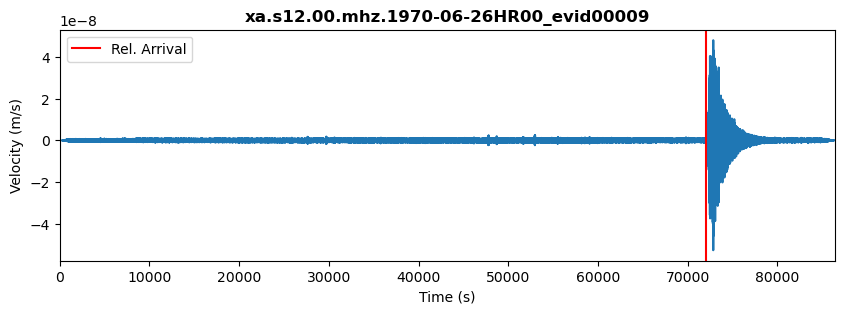

In [8]:
# Read in time steps and velocities
csv_times = np.array(data_cat['time_rel(sec)'].tolist())
csv_data = np.array(data_cat['velocity(m/s)'].tolist())

# Plot the trace! 
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(csv_times,csv_data)

# Make the plot pretty
ax.set_xlim([min(csv_times),max(csv_times)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
ax.set_title(f'{test_filename}', fontweight='bold')

# Plot where the arrival time is
arrival_line = ax.axvline(x=arrival_time_rel, c='red', label='Rel. Arrival')
ax.legend(handles=[arrival_line])

What if you wanted to plot in absolute time instead? The operations are very similar, just with a little extra datetime. It takes a bit longer, so we recommend working in relative time to start with!

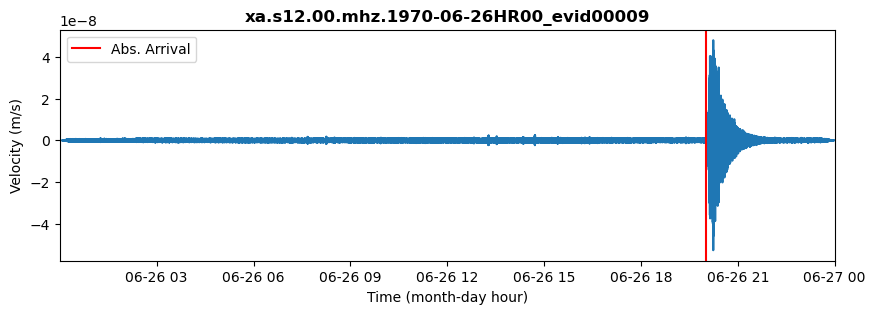

In [9]:
# Read in time steps and velocities
csv_times_dt = []
for absval_str in data_cat['time_abs(%Y-%m-%dT%H:%M:%S.%f)'].values:
    csv_times_dt.append(datetime.strptime(absval_str,'%Y-%m-%dT%H:%M:%S.%f'))

csv_data = np.array(data_cat['velocity(m/s)'].tolist())

# Plot the trace! 
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(csv_times_dt,csv_data)

# Make the plot pretty
ax.set_xlim((np.min(csv_times_dt),np.max(csv_times_dt)))
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (month-day hour)')
ax.set_title(f'{test_filename}', fontweight='bold')

# Plot where the arrival time is
arrival_line = ax.axvline(x=arrival_time, c='red', label='Abs. Arrival')
ax.legend(handles=[arrival_line])

### Alternatively: read the miniseed file corresponding to that detection

Same procedure as above, just using the miniseed file. 

In [10]:
data_directory = './data/lunar/training/data/S12_GradeA/'
mseed_file = f'{data_directory}{test_filename}.mseed'
st = read(mseed_file)
st

1 Trace(s) in Stream:
XA.S12.00.MHZ | 1970-06-26T00:00:00.116000Z - 1970-06-27T00:00:03.436755Z | 6.6 Hz, 572423 samples

In [11]:
# The stream file also contains some useful header information
st[0].stats

         network: XA
         station: S12
        location: 00
         channel: MHZ
       starttime: 1970-06-26T00:00:00.116000Z
         endtime: 1970-06-27T00:00:03.436755Z
   sampling_rate: 6.625
           delta: 0.1509433962264151
            npts: 572423
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1136, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 4653056})

In [12]:
# This is how you get the data and the time, which is in seconds
tr = st.traces[0].copy()
tr_times = tr.times()
tr_data = tr.data

# Start time of trace (another way to get the relative arrival time using datetime)
starttime = tr.stats.starttime.datetime
arrival = (arrival_time - starttime).total_seconds()
arrival

72059.884

### Plot the trace and mark the arrival! 

Use a similar method to plot the miniseed data and seismic arrival.

Text(0.5, 1.0, 'xa.s12.00.mhz.1970-06-26HR00_evid00009')

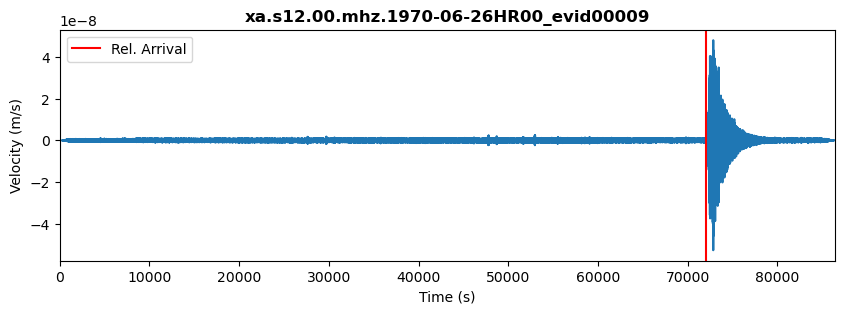

In [13]:
# Initialize figure
fig,ax = plt.subplots(1,1,figsize=(10,3))

# Plot trace
ax.plot(tr_times,tr_data)

# Mark detection
ax.axvline(x = arrival, color='red',label='Rel. Arrival')
ax.legend(loc='upper left')

# Make the plot pretty
ax.set_xlim([min(tr_times),max(tr_times)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
ax.set_title(f'{test_filename}', fontweight='bold')

# Mi prueba

Text(0.5, 1.0, 'xa.s12.00.mhz.1970-06-26HR00_evid00009')

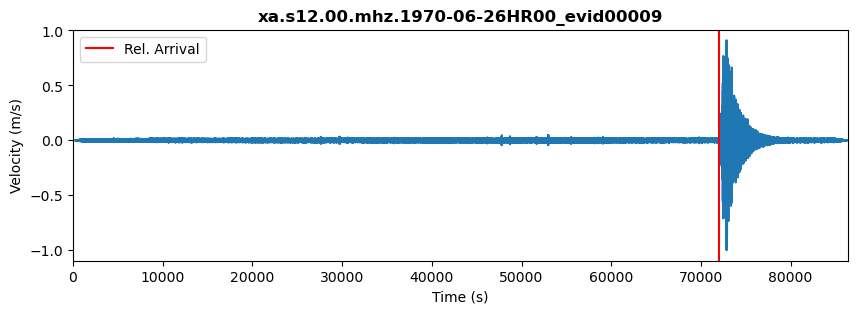

In [14]:
# Initialize figure
fig,ax = plt.subplots(1,1,figsize=(10,3))

# Plot trace
tr_data_max = np.max(np.abs(tr_data))
ax.plot(tr_times,tr_data/tr_data_max)

# Mark detection
ax.axvline(x = arrival, color='red',label='Rel. Arrival')
ax.legend(loc='upper left')

# Make the plot pretty
ax.set_xlim([min(tr_times),max(tr_times)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
ax.set_title(f'{test_filename}', fontweight='bold')

There are multiple ways that we can do the absolute time using datetime, here is a simple way using the `.timedelta` method

Text(0.5, 1.0, 'xa.s12.00.mhz.1970-06-26HR00_evid00009')

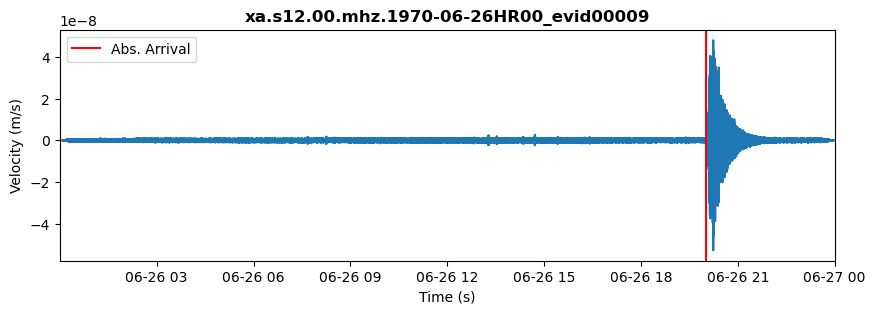

In [15]:
# Create a vector for the absolute time
tr_times_dt = []
for tr_val in tr_times:
    tr_times_dt.append(starttime + timedelta(seconds=tr_val))

# Plot the absolute result
fig,ax = plt.subplots(1,1,figsize=(10,3))

# Plot trace
ax.plot(tr_times_dt,tr_data)

# Mark detection
arrival_line = ax.axvline(x=arrival_time, c='red', label='Abs. Arrival')
ax.legend(handles=[arrival_line])

# Make the plot pretty
ax.set_xlim([min(tr_times_dt),max(tr_times_dt)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
ax.set_title(f'{test_filename}', fontweight='bold')


It's completely up to you whether to work with the CSV file or the miniseed files. We recommend working with the miniseed file as it's a bit faster to run. 

## Let's filter the trace

Sometimes, it's useful to filter the trace to bring out particular frequencies. This will change the shape of the data and make it easier to see certain parts of the signal. In this example, we will filter the data using a bandpass filter between 0.01 Hz to 0.5 Hz. 

In [16]:
# Set the minimum frequency
minfreq = 0.5
maxfreq = 1.0

# Going to create a separate trace for the filter data
st_filt = st.copy()
st_filt.filter('bandpass',freqmin=minfreq,freqmax=maxfreq)
tr_filt = st_filt.traces[0].copy()
tr_times_filt = tr_filt.times()
tr_data_filt = tr_filt.data

In [17]:
# To better see the patterns, we will create a spectrogram using the scipy function
# It requires the sampling rate, which we can get from the miniseed header as shown a few cells above
from scipy import signal
from matplotlib import cm
f, t, sxx = signal.spectrogram(tr_data_filt, tr_filt.stats.sampling_rate)

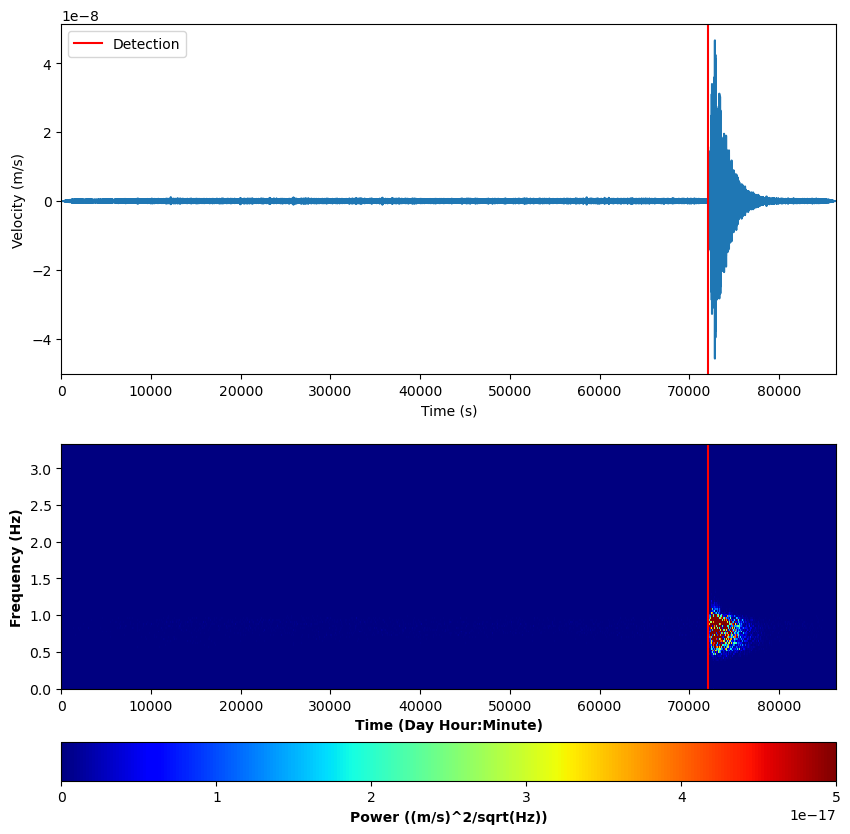

In [18]:
# Plot the time series and spectrogram
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(2, 1, 1)
# Plot trace
ax.plot(tr_times_filt,tr_data_filt)

# Mark detection
ax.axvline(x = arrival, color='red',label='Detection')
ax.legend(loc='upper left')

# Make the plot pretty
ax.set_xlim([min(tr_times_filt),max(tr_times_filt)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')

ax2 = plt.subplot(2, 1, 2)
vals = ax2.pcolormesh(t, f, sxx, cmap=cm.jet, vmax=5e-17)
ax2.set_xlim([min(tr_times_filt),max(tr_times_filt)])
ax2.set_xlabel(f'Time (Day Hour:Minute)', fontweight='bold')
ax2.set_ylabel('Frequency (Hz)', fontweight='bold')
ax2.axvline(x=arrival, c='red')
cbar = plt.colorbar(vals, orientation='horizontal')
cbar.set_label('Power ((m/s)^2/sqrt(Hz))', fontweight='bold')

# Sample short-term average / long-term average (STA/LTA) detection algorithm

A STA/LTA algorithm moves two time windows of two lengths (one short, one long) across the seismic data. The algorithm calculates the average amplitude in both windows, and calculates the ratio between them. If the data contains an earthquake, then the short-term window containing the earthquake will be much larger than the long-term window -- resulting in a detection. 

Text(0, 0.5, 'Characteristic function')

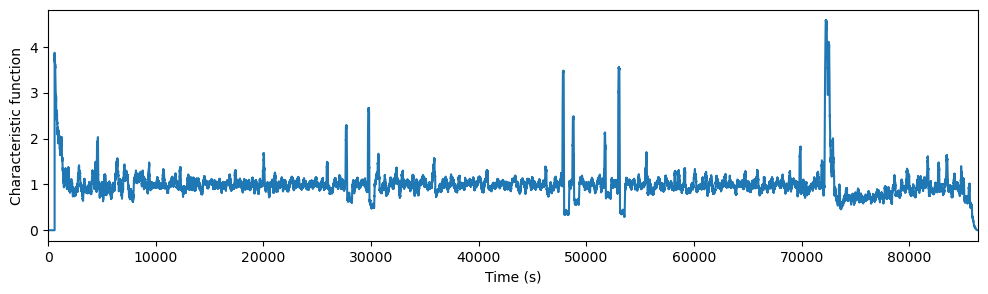

In [19]:
from obspy.signal.invsim import cosine_taper
from obspy.signal.filter import highpass
from obspy.signal.trigger import classic_sta_lta, plot_trigger, trigger_onset

# Sampling frequency of our trace
df = tr.stats.sampling_rate

# How long should the short-term and long-term window be, in seconds?
sta_len = 120
lta_len = 600

# Run Obspy's STA/LTA to obtain a characteristic function
# This function basically calculates the ratio of amplitude between the short-term 
# and long-term windows, moving consecutively in time across the data
cft = classic_sta_lta(tr_data, int(sta_len * df), int(lta_len * df))

# Plot characteristic function
fig,ax = plt.subplots(1,1,figsize=(12,3))
ax.plot(tr_times,cft)
ax.set_xlim([min(tr_times),max(tr_times)])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Characteristic function')

In [20]:
stop 

NameError: name 'stop' is not defined

Next, we define the values of the characteristic function (i.e. amplitude ratio between short-term and long-term windows) where we flag a seismic detection. These values are called triggers. There are two types of triggers -- "on" and "off", defined as follows:

1. "on" : If the characteristic function is above this value, then a seismic event begins. 
2. "off" : If the characteristic function falls below this value (after an "on" trigger), than a seismic event ends. 

## Datos

In [228]:
cat_directory = './data/lunar/training/catalogs/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'

cat = pd.read_csv(cat_file)


test_filenames = cat['filename']

data_directory = './data/lunar/training/data/S12_GradeA/'

# Y := los tiempos de cada documento donde empieza el terremoto
# X := lista de Matrices de dos columnas con time y velocity

Y  = cat['time_rel(sec)'].to_list()


X = []

for idx, test_filename in enumerate(test_filenames):
    # Build the full path for the CSV file
    csv_file = f'{data_directory}{test_filename}.csv'
    
    
    # Check if the file exists
    if os.path.exists(csv_file):
        try:
            # Read the CSV file
            df_file = pd.read_csv(csv_file)
            
            # Extract time and velocity data
            times = np.array(df_file['time_rel(sec)'].tolist())
            velocity = np.array(df_file['velocity(m/s)'].tolist())
            
            # Append [times, velocity] to X
            X.append(np.column_stack((times, velocity)))
            X.append(np.column_stack((times, velocity * -1)))
            #X.append(np.column_stack((times, velocity + np.random.normal(np.mean(velocity) , np.std(velocity)) )  )) # velocidades por mitad

            print(idx*2," , ", test_filename )
        except Exception as e:
            print(f"Error reading {csv_file}: {e}")
            
    else:
        print(f"File {csv_file} does not exist. Skipping...")
        del Y[idx]


Y_new = []
for y in Y:
    Y_new.append(y)
    Y_new.append(y)
    #Y_new.append(y)
Y = Y_new


0  ,  xa.s12.00.mhz.1970-01-19HR00_evid00002
2  ,  xa.s12.00.mhz.1970-03-25HR00_evid00003
4  ,  xa.s12.00.mhz.1970-03-26HR00_evid00004
6  ,  xa.s12.00.mhz.1970-04-25HR00_evid00006
8  ,  xa.s12.00.mhz.1970-04-26HR00_evid00007
10  ,  xa.s12.00.mhz.1970-06-15HR00_evid00008
12  ,  xa.s12.00.mhz.1970-06-26HR00_evid00009
14  ,  xa.s12.00.mhz.1970-07-20HR00_evid00010
16  ,  xa.s12.00.mhz.1970-07-20HR00_evid00011
18  ,  xa.s12.00.mhz.1970-09-26HR00_evid00013
20  ,  xa.s12.00.mhz.1970-10-24HR00_evid00014
22  ,  xa.s12.00.mhz.1970-11-12HR00_evid00015
24  ,  xa.s12.00.mhz.1970-12-11HR00_evid00017
26  ,  xa.s12.00.mhz.1970-12-27HR00_evid00019
28  ,  xa.s12.00.mhz.1970-12-31HR00_evid00021
30  ,  xa.s12.00.mhz.1971-01-15HR00_evid00022
32  ,  xa.s12.00.mhz.1971-01-28HR00_evid00023
34  ,  xa.s12.00.mhz.1971-01-29HR00_evid00024
36  ,  xa.s12.00.mhz.1971-02-09HR00_evid00026
38  ,  xa.s12.00.mhz.1971-03-25HR00_evid00028
File ./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1971-04-13HR00_evid00029.csv

In [127]:
len(X)

150

In [128]:
len(Y)

150

Normalizando

In [129]:

for i in range(len(X)):
    X[i][:,1] =  X[i][:,1]/ np.max(np.abs(X[i][:,1]))

In [130]:
print(Y[0])

73500.0


## Triggers On/Off

In [131]:
print(arrival)

72059.884


572411


Text(0, 0.5, 'Characteristic function')

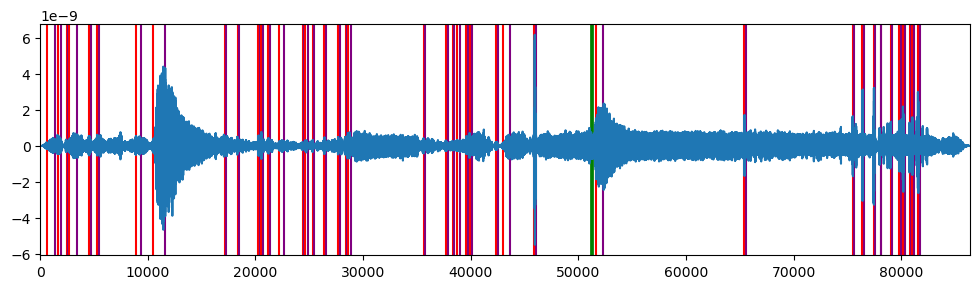

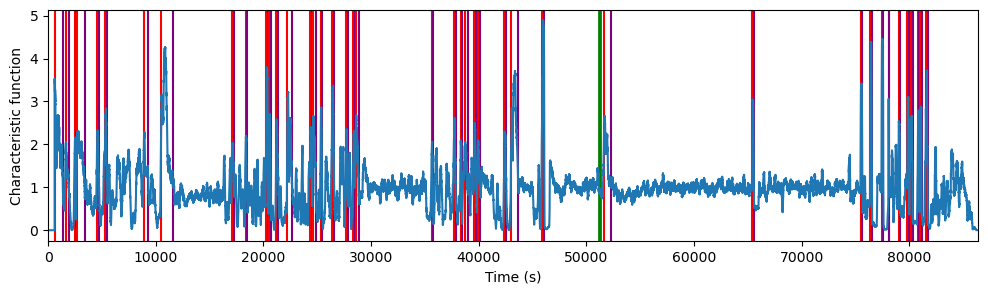

In [229]:
want_to_see = 134

see_data = X[want_to_see]

print(len(see_data[:,1]))

cft = classic_sta_lta(see_data[:,1], int(sta_len * df), int(lta_len * df))


# Play around with the on and off triggers, based on values in the characteristic function
thr_on = 2
thr_off = 1
on_off = np.array(trigger_onset(cft, thr_on, thr_off))
triggers = np.array(trigger_onset(cft, thr_on, thr_off))
# The first column contains the indices where the trigger is turned "on". 
# The second column contains the indices where the trigger is turned "off".

# Plot on and off triggers
fig,ax = plt.subplots(1,1,figsize=(12,3))
for i in np.arange(0,len(on_off)):
    triggers = on_off[i]
    ax.axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')
    ax.axvline(x = tr_times[triggers[1]], color='purple', label='Trig. Off')
    ax.axvline(x = Y[want_to_see], color='green',label='Rel. Arrival')

# Plot seismogram
ax.plot(see_data[:,0],see_data[:,1])
ax.set_xlim([min(see_data[:,0]),max(see_data[:,0])])


# Plot characteristic function
fig,ax = plt.subplots(1,1,figsize=(12,3))
for i in np.arange(0,len(on_off)):
    triggers = on_off[i]
    ax.axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')
    ax.axvline(x = tr_times[triggers[1]], color='purple', label='Trig. Off')
    ax.axvline(x = Y[want_to_see], color='green',label='Rel. Arrival')

ax.plot(see_data[:,0],cft)
ax.set_xlim([min(see_data[:,0]),max(see_data[:,0])])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Characteristic function')

In [133]:

def extract_waveform_segments(signal, triggers, segment_length, sampling_rate):
    """
    Extract waveform segments based on STA/LTA trigger on and off times.
    Args:
        signal: Seismic waveform (numpy array).
        triggers: List of tuples (on, off) indicating start and end indices of triggers.
        segment_length: Fixed length to pad or truncate the segments.
        sampling_rate: Sampling rate of the signal (samples per second).
    Returns:
        padded_segments: List of padded or truncated waveform segments.
    """
    waveform_segments = []
    #print(triggers)
    for i in np.arange(0,len(triggers)):
        waveform_segments_i = []
        for j in np.arange(0,len(triggers[i])):
            trigger = triggers[i][j]
            event_start = trigger[0]
            event_end = trigger[1]
            
            # Extract the waveform segment between the on and off triggers
            segment = signal[i][1][event_start:event_end]
            
            
            # Truncate or pad the segment to the fixed length
            if len(segment) < segment_length:
                # Pad with zeros if the segment is too short
                padded_segment = np.pad(segment, (0, segment_length - len(segment)), 'constant')
            else:
                # Truncate if the segment is too long
                padded_segment = segment[:segment_length]
                
            #print(padded_segment.shape)
            if ( len(padded_segment) != 300 ):
                print(i,", ",len(padded_segment))
            waveform_segments_i.append(padded_segment)
        waveform_segments.append(waveform_segments_i)
    
    return waveform_segments


## Ventana

In [134]:
print(X[0][:,1].shape)

(572415,)


In [135]:
cft = []
for i in np.arange(len(X)):
    cft_i = classic_sta_lta(X[i][:,1], int(sta_len * df), int(lta_len * df))
    cft.append(cft_i)


In [136]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def preprocess_waveforms(waveforms, max_length):
    """
    Preprocess waveforms by padding or truncating them to a fixed length.
    Args:
        waveforms: List of waveforms (variable length).
        max_length: The maximum length of the waveform segments.
    Returns:
        padded_waveforms: Waveforms padded/truncated to max_length.
    """
    padded_waveforms = pad_sequences(waveforms, maxlen=max_length, padding='post', truncating='post', dtype='float32')
    return padded_waveforms

# Example usage
 # Define a fixed length (e.g., 300 time steps)
max_length = 300
triggers = []
y_label = []
for i in range(len(X)):
    triggers_i = np.array(trigger_onset(cft[i], thr_on, thr_off))
    triggers.append(triggers_i)
    starts = []
    for t in np.arange(len(triggers_i)):
        starts.append(X[i][:,1][triggers_i[t][0]])
    starts = np.array(starts)
    pos = np.argmin(np.abs(starts - Y[i]))
    y_label_i = np.zeros(len(triggers_i))
    y_label_i[pos]=1
    y_label.append(y_label_i)

print(len(y_label))

waveform_segments = extract_waveform_segments(X, triggers, max_length, None)
 
#padded_segments = preprocess_waveforms(waveform_segments, max_length)
padded_segments = waveform_segments



150


In [137]:
print(len(y_label))

150


In [138]:
print(len(padded_segments))

150


In [139]:
print(len(y_label))

150


In [140]:
print(y_label[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [141]:
print(len(padded_segments))

150


In [142]:
print(len(padded_segments[0][0]))

300


## Modelo

In [143]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# 1D Convolutional Layer
model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(300, 1)))

# Pooling Layer to reduce dimensionality
model.add(layers.MaxPooling1D(pool_size=2))

# Add more convolutional layers if necessary
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))

# Flatten the output of the last convolutional layer
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer for binary classification
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 298, 32)           128       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 149, 32)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 147, 64)           6208      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 73, 64)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4672)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [144]:
printiflkfajl

NameError: name 'printiflkfajl' is not defined

In [145]:
print(len(padded_segments), " ", len(padded_segments[0]))

150   46


In [146]:
print(len(y_label), " ", len(y_label[0]))

150   46


In [147]:
print(y_label[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [148]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Supón que X_train es tu lista de segmentos de ondas, y Y_train son las etiquetas correspondientes

# Ejemplo: Si X_train es una lista de secuencias de (n, 300)
X_train = padded_segments  # Lista de arrays con diferentes números de filas (samples)
Y_train = y_label          # Etiquetas, donde cada elemento es 0 o 1 (clasificación binaria)

XX_train = []
YY_train = []
for i in range(len(X_train)):
    zero_found = 0
    one_found = 0
    for j in range(len(X_train[i])):
        res = y_label[i][j]
        if(res == 0 and zero_found == 0):
            zero_found = 1
            XX_train.append(X_train[i][j])
            YY_train.append(res)
        elif(res == 1 and one_found == 0):
            one_found = 1
            XX_train.append(X_train[i][j])
            YY_train.append(res)

XX_train = np.array(XX_train)
YY_train = np.array(YY_train)

# Verifica las formas
print("X_train shape:", XX_train.shape)  # Debe ser (num_samples, 300, 1)
print("Y_train shape:", YY_train.shape)  # Debe ser (num_samples,)

# Divide el conjunto de datos en conjuntos de entrenamiento y prueba
XXX_train, XXX_test, YYY_train, YYY_test = train_test_split(XX_train, YY_train, test_size=0.2, random_state=42)

# Entrena el modelo LSTM
history = model.fit(XXX_train, YYY_train, epochs=20, batch_size=32, shuffle=True, validation_data=(XXX_test, YYY_test))

X_train shape: (300, 300)
Y_train shape: (300,)
Epoch 1/20
8/8 [==============================] - 1s 70ms/step - loss: 0.6932 - accuracy: 0.5167 - val_loss: 0.6933 - val_accuracy: 0.4333
Epoch 2/20
8/8 [==============================] - 0s 50ms/step - loss: 0.6931 - accuracy: 0.5167 - val_loss: 0.6933 - val_accuracy: 0.4333
Epoch 3/20
8/8 [==============================] - 0s 13ms/step - loss: 0.6931 - accuracy: 0.5167 - val_loss: 0.6935 - val_accuracy: 0.4333
Epoch 4/20
8/8 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5167 - val_loss: 0.6936 - val_accuracy: 0.4333
Epoch 5/20
8/8 [==============================] - 0s 19ms/step - loss: 0.6930 - accuracy: 0.5167 - val_loss: 0.6937 - val_accuracy: 0.4333
Epoch 6/20
8/8 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5167 - val_loss: 0.6939 - val_accuracy: 0.4333
Epoch 7/20
8/8 [==============================] - 0s 7ms/step - loss: 0.6930 - accuracy: 0.5167 - val_loss: 0.6940 - val

## Test

In [59]:
def get_csv_filenames(directory):
    """
    Gets all the CSV filenames from the specified directory.
    
    Args:
        directory (str): The path to the folder containing CSV files.
        
    Returns:
        List of CSV filenames in the directory.
    """
    # List all files in the directory
    files = os.listdir(directory)
    
    # Filter the list to include only CSV files
    csv_files = [file for file in files if file.endswith('.csv')]
    
    return csv_files

In [60]:
data_test_directory = './data/lunar/test/data/S12_GradeB'

csv_test_filenames = get_csv_filenames(data_test_directory)


X_test = []

for idx, test_filename in enumerate(csv_test_filenames):
    # Build the full path for the CSV file
    csv_file = f'{data_test_directory}/{test_filename}'
    
    # Check if the file exists
    if os.path.exists(csv_file):
        try:
            # Read the CSV file
            df_file = pd.read_csv(csv_file)
            
            # Extract time and velocity data
            times = np.array(df_file['time_rel(sec)'].tolist())
            velocity = np.array(df_file['velocity(m/s)'].tolist())
            
            # Append [times, velocity] to X
            X_test.append(np.column_stack((times, velocity)))
        except Exception as e:
            print(f"Error reading {csv_file}: {e}")
            
    else:
        print(f"File {csv_file} does not exist. Skipping...")
        

In [61]:

for i in range(len(X_test)):
    X_test[i][:,1] =  X_test[i][:,1]/ np.max(np.abs(X_test[i][:,1]))

In [62]:
cft_test = []
for i in np.arange(len(X_test)):
    cft_test_i = classic_sta_lta(X_test[i][:,1], int(sta_len * df), int(lta_len * df))
    cft_test.append(cft_test_i)

test_triggers = []
for i in range(len(X_test)):
    test_triggers_i = np.array(trigger_onset(cft_test[i], thr_on, thr_off))
    test_triggers.append(test_triggers_i)


test_waveform_segments = extract_waveform_segments(X_test, test_triggers, max_length, None)

test_padded_segments = test_waveform_segments



In [63]:
X_eval = test_padded_segments


XX_eval = []

for i in range(len(X_eval)):
    for j in range(len(X_eval[i])):
        XX_eval.append(X_eval[i][j])


print("X_eval shape:", len(XX_eval))  # Should be (num_samples, time_steps, 1)

XX_eval = np.array(XX_eval)


X_eval shape: 2820


In [64]:
y_pred =  (model.predict(XX_train) > 0.5).astype("int32")


10/10 [==============================] - 1s 58ms/step


In [65]:
print(model.predict(XX_train))

10/10 [==============================] - 1s 57ms/step
[[0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.41132867]
 [0.4113

In [637]:
print(len(y_pred))

120


In [638]:
for i in range(len(y_pred)):
    if(y_pred[i][0] == 1 ):
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119


In [639]:
counter_lines = 0
y_pred_global = []
for i in range(len(X_eval)):
    on_lines = len(X_eval[i]) 
    y_pred_local = []
    for j in range(counter_lines, counter_lines+on_lines):
        y_pred_local.append(y_pred[j][0])
    counter_lines += on_lines
    y_pred_global.append(y_pred_local)

    #print(len(y_pred_local))

    

IndexError: index 120 is out of bounds for axis 0 with size 120

In [640]:
for i in range(len(y_pred_global)):
    print(np.sum(y_pred_global[i]))

43
46


In [641]:
y_pred_global[0]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

572423


(0.0, 86403.32075471699)

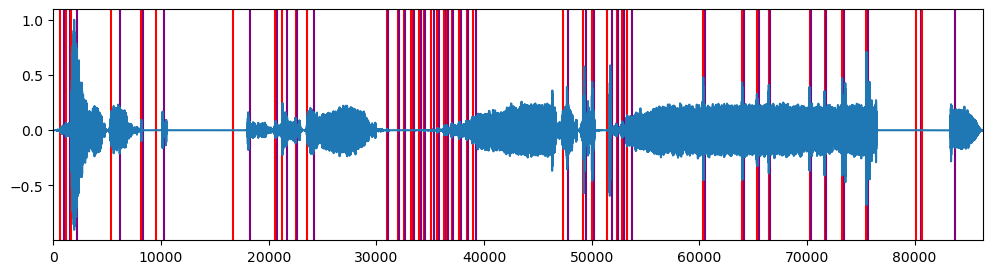

In [568]:
want_to_see = 0

see_data = X_test[want_to_see]

print(len(see_data[:,1]))

cft = classic_sta_lta(see_data[:,1], int(sta_len * df), int(lta_len * df))


# Play around with the on and off triggers, based on values in the characteristic function
thr_on = 2
thr_off = 1
on_off = np.array(trigger_onset(cft, thr_on, thr_off))
triggers = np.array(trigger_onset(cft, thr_on, thr_off))
# The first column contains the indices where the trigger is turned "on". 
# The second column contains the indices where the trigger is turned "off".

# Plot on and off triggers
fig,ax = plt.subplots(1,1,figsize=(12,3))
for i in np.arange(0,len(on_off)):
    triggers = on_off[i]
    ax.axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')
    ax.axvline(x = tr_times[triggers[1]], color='purple', label='Trig. Off')

# Plot seismogram
ax.plot(see_data[:,0],see_data[:,1])
ax.set_xlim([min(see_data[:,0]),max(see_data[:,0])])


In [569]:
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(classification_report(y_test, y_pred))


ValueError: Data cardinality is ambiguous:
  x sizes: 572423, 572423, 572423, 572415, 572423, 572358, 572423, 572411, 572415, 572411, 572411, 572415, 572411, 572411, 572411, 572418, 572427, 572418, 572423, 572423, 572423, 542927, 572415, 572411, 266390, 572423, 572418, 572402, 572420, 572420, 572399, 572402, 572415, 572399, 572418, 572399, 572402, 572395, 572415, 572399, 572399, 572402, 572395, 572415, 572282, 477311, 572415, 572390, 572415, 569190, 572407, 572418, 451511, 572407, 572423, 572423, 572418, 572418, 572418, 572415, 572386, 572386, 564394, 572374
Make sure all arrays contain the same number of samples.

## Solucion 

In [32]:
import pandas as pd

# Load the uploaded CSV file to inspect its contents
file_path = 'C:\\Code\\PythonCode\\NASAhack\\space_apps_2024_seismic_detection\\space_apps_2024_seismic_detection\\data\\lunar\\training\\data\\S12_GradeA\\xa.s12.00.mhz.1973-03-24HR00_evid00097.csv'
data = pd.read_csv(file_path)
#space_apps_2024_seismic_detection\data\lunar\training\data\S12_GradeA\xa.s12.00.mhz.1973-03-24HR00_evid00097.csv
# Display the first few rows of the data to understand its structure
data.head()

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
0,1973-03-24T00:00:00.606000,0.000000,2.654473e-15
1,1973-03-24T00:00:00.756943,0.150943,1.496578e-15
2,1973-03-24T00:00:00.907887,0.301887,4.665899e-16
3,1973-03-24T00:00:01.058830,0.452830,2.721695e-16
4,1973-03-24T00:00:01.209774,0.603774,9.075782e-16


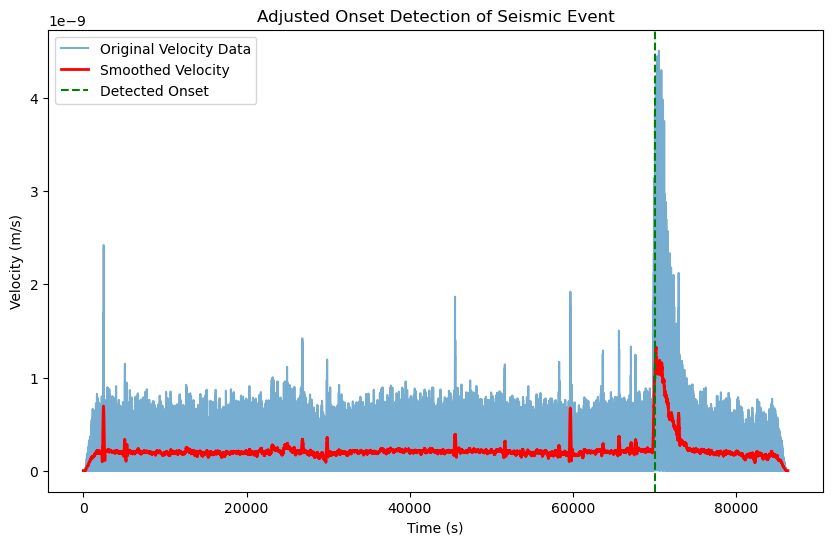

70091.92452830188

In [39]:
from scipy.signal import savgol_filter

# Filtramos los valores positivos de velocidad para concentrarnos en el evento
positive_velocity_data = data['velocity(m/s)'][data['velocity(m/s)'] > 0]
positive_time_data = data['time_rel(sec)'][data['velocity(m/s)'] > 0]

# Aplicamos un filtro Savitzky-Golay para suavizar la señal de velocidad
smoothed_velocity = savgol_filter(positive_velocity_data, window_length=1000, polyorder=3)

# Detectar el inicio del sismo: encontramos el punto donde la pendiente de la curva aumenta bruscamente
# Calculamos la primera derivada de la señal suavizada para detectar el incremento brusco
first_derivative = np.gradient(smoothed_velocity)

# Definimos un umbral para detectar la elevación significativa (inicio del sismo)
threshold = np.max(first_derivative) * 0.1

# Ajustar un umbral más alto para detectar la elevación significativa en la señal suavizada
# Queremos que la línea verde esté cerca del pico del evento
new_threshold = np.max(first_derivative) * 0.65  # Aumentamos el umbral al 50% del valor máximo de la derivada

# Detectar el primer punto donde la pendiente supera este nuevo umbral
onset_index_new = np.where(first_derivative > new_threshold)[0][0]
onset_time_new = positive_time_data.iloc[onset_index_new]

# Graficar los resultados con el nuevo umbral
plt.figure(figsize=(10, 6))
plt.plot(positive_time_data, positive_velocity_data, label='Original Velocity Data', alpha=0.6)
plt.plot(positive_time_data, smoothed_velocity, label='Smoothed Velocity', color='red', linewidth=2)
plt.axvline(x=onset_time_new, color='green', linestyle='--', label='Detected Onset')
plt.title('Adjusted Onset Detection of Seismic Event')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.show()

onset_time_new


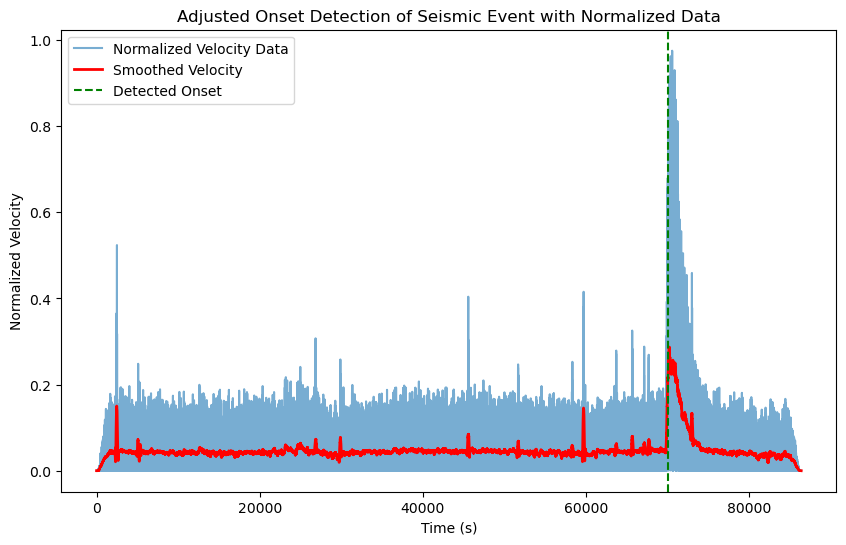

70091.92452830188

In [43]:
# Normalizar los datos de velocidad entre -1 y 1 antes de seleccionar los valores positivos

# Obtener el valor máximo absoluto de la columna de velocidad
max_velocity = np.max(np.abs(data['velocity(m/s)']))

# Normalizar los datos de velocidad entre -1 y 1
data['normalized_velocity'] = data['velocity(m/s)'] / max_velocity

# Filtramos los valores positivos de velocidad normalizados para concentrarnos en el evento
positive_velocity_data = data['normalized_velocity'][data['normalized_velocity'] > 0]
positive_time_data = data['time_rel(sec)'][data['normalized_velocity'] > 0]

# Aplicamos un filtro Savitzky-Golay para suavizar la señal de velocidad
smoothed_velocity = savgol_filter(positive_velocity_data, window_length=1000, polyorder=3)

# Detectar el inicio del sismo: encontramos el punto donde la pendiente de la curva aumenta bruscamente
# Calculamos la primera derivada de la señal suavizada para detectar el incremento brusco
first_derivative = np.gradient(smoothed_velocity)

# Ajustar un umbral más alto para detectar la elevación significativa en la señal suavizada
new_threshold = np.max(first_derivative) * 0.65  # Aumentamos el umbral al 65% del valor máximo de la derivada

# Detectar el primer punto donde la pendiente supera este nuevo umbral
onset_index_new = np.where(first_derivative > new_threshold)[0][0]
onset_time_new = positive_time_data.iloc[onset_index_new]

# Graficar los resultados con el nuevo umbral
plt.figure(figsize=(10, 6))
plt.plot(positive_time_data, positive_velocity_data, label='Normalized Velocity Data', alpha=0.6)
plt.plot(positive_time_data, smoothed_velocity, label='Smoothed Velocity', color='red', linewidth=2)
plt.axvline(x=onset_time_new, color='green', linestyle='--', label='Detected Onset')
#plt.axvline(x=onset_time_new, color='green', linestyle='--', label='Detected Onset')
plt.title('Adjusted Onset Detection of Seismic Event with Normalized Data')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Velocity')
plt.legend()
plt.show()

onset_time_new


### Presentacion

In [46]:
import pandas as pd

# Load the uploaded CSV file to inspect its contents
file_path = 'C:\\Code\\PythonCode\\NASAhack\\space_apps_2024_seismic_detection\\space_apps_2024_seismic_detection\\data\\lunar\\training\\data\\S12_GradeA\\xa.s12.00.mhz.1973-03-24HR00_evid00097.csv'
data = pd.read_csv(file_path)
#space_apps_2024_seismic_detection\data\lunar\training\data\S12_GradeA\xa.s12.00.mhz.1973-03-24HR00_evid00097.csv
# Display the first few rows of the data to understand its structure
data.head()

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
0,1973-03-24T00:00:00.606000,0.000000,2.654473e-15
1,1973-03-24T00:00:00.756943,0.150943,1.496578e-15
2,1973-03-24T00:00:00.907887,0.301887,4.665899e-16
3,1973-03-24T00:00:01.058830,0.452830,2.721695e-16
4,1973-03-24T00:00:01.209774,0.603774,9.075782e-16


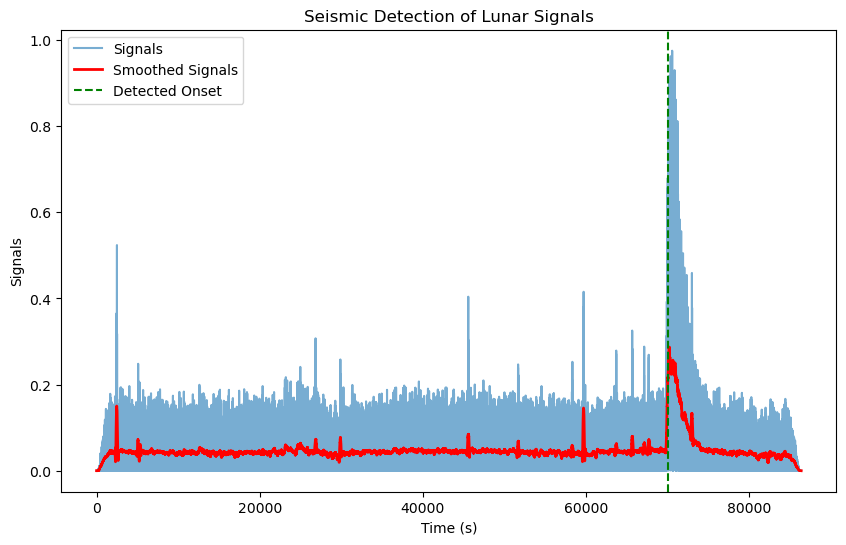

70091.92452830188

In [47]:
# Normalizar los datos de velocidad entre -1 y 1 antes de seleccionar los valores positivos

# Obtener el valor máximo absoluto de la columna de velocidad
max_velocity = np.max(np.abs(data['velocity(m/s)']))

# Normalizar los datos de velocidad entre -1 y 1
data['normalized_velocity'] = data['velocity(m/s)'] / max_velocity

# Filtramos los valores positivos de velocidad normalizados para concentrarnos en el evento
positive_velocity_data = data['normalized_velocity'][data['normalized_velocity'] > 0]
positive_time_data = data['time_rel(sec)'][data['normalized_velocity'] > 0]

# Aplicamos un filtro Savitzky-Golay para suavizar la señal de velocidad
smoothed_velocity = savgol_filter(positive_velocity_data, window_length=1000, polyorder=3)

# Detectar el inicio del sismo: encontramos el punto donde la pendiente de la curva aumenta bruscamente
# Calculamos la primera derivada de la señal suavizada para detectar el incremento brusco
first_derivative = np.gradient(smoothed_velocity)

# Ajustar un umbral más alto para detectar la elevación significativa en la señal suavizada
new_threshold = np.max(first_derivative) * 0.65  # Aumentamos el umbral al 65% del valor máximo de la derivada

# Detectar el primer punto donde la pendiente supera este nuevo umbral
onset_index_new = np.where(first_derivative > new_threshold)[0][0]
onset_time_new = positive_time_data.iloc[onset_index_new]

# Graficar los resultados con el nuevo umbral
plt.figure(figsize=(10, 6))
plt.plot(positive_time_data, positive_velocity_data, label='Signals', alpha=0.6)
plt.plot(positive_time_data, smoothed_velocity, label='Smoothed Signals', color='red', linewidth=2)
plt.axvline(x=onset_time_new, color='green', linestyle='--', label='Detected Onset')
plt.title('Seismic Detection of Lunar Signals')
plt.xlabel('Time (s)')
plt.ylabel('Signals')
plt.legend()
plt.show()

onset_time_new


In [54]:
import pandas as pd

# Load the uploaded CSV file to inspect its contents
file_path = 'C:\\Code\\PythonCode\\NASAhack\\space_apps_2024_seismic_detection\\space_apps_2024_seismic_detection\\data\\mars\\training\\data\\XB.ELYSE.02.BHV.2022-02-03HR08_evid0005.csv'
data = pd.read_csv(file_path)
#space_apps_2024_seismic_detection\data\mars\training\data\XB.ELYSE.02.BHV.2022-02-03HR08_evid0005.csv
# Display the first few rows of the data to understand its structure
data.head()

,time(%Y-%m-%dT%H:%M:%S.%f),rel_time(sec),velocity(c/s)
0,2022-02-03T08:00:00.009000,0.00,0.000000
1,2022-02-03T08:00:00.059000,0.05,0.000128
2,2022-02-03T08:00:00.109000,0.10,0.000703
3,2022-02-03T08:00:00.159000,0.15,-0.001124
4,2022-02-03T08:00:00.209000,0.20,-0.003985


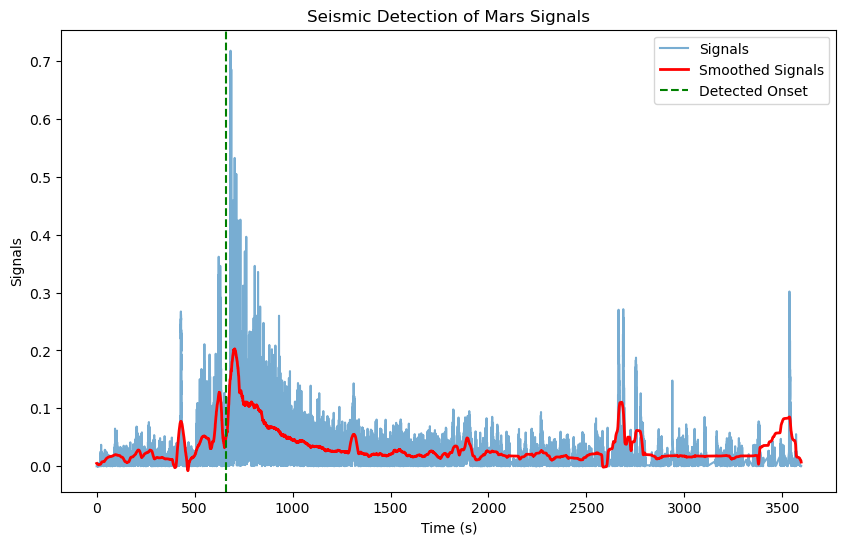

658.2

In [56]:
# Normalizar los datos de velocidad entre -1 y 1 antes de seleccionar los valores positivos

# Obtener el valor máximo absoluto de la columna de velocidad
max_velocity = np.max(np.abs(data['velocity(c/s)']))

# Normalizar los datos de velocidad entre -1 y 1
data['normalized_velocity'] = data['velocity(c/s)'] / max_velocity

# Filtramos los valores positivos de velocidad normalizados para concentrarnos en el evento
positive_velocity_data = data['normalized_velocity'][data['normalized_velocity'] > 0]
positive_time_data = data['rel_time(sec)'][data['normalized_velocity'] > 0]

# Aplicamos un filtro Savitzky-Golay para suavizar la señal de velocidad
smoothed_velocity = savgol_filter(positive_velocity_data, window_length=1000, polyorder=3)

# Detectar el inicio del sismo: encontramos el punto donde la pendiente de la curva aumenta bruscamente
# Calculamos la primera derivada de la señal suavizada para detectar el incremento brusco
first_derivative = np.gradient(smoothed_velocity)

# Ajustar un umbral más alto para detectar la elevación significativa en la señal suavizada
new_threshold = np.max(first_derivative) * 0.65  # Aumentamos el umbral al 65% del valor máximo de la derivada

# Detectar el primer punto donde la pendiente supera este nuevo umbral
onset_index_new = np.where(first_derivative > new_threshold)[0][0]
onset_time_new = positive_time_data.iloc[onset_index_new]

# Graficar los resultados con el nuevo umbral
plt.figure(figsize=(10, 6))
plt.plot(positive_time_data, positive_velocity_data, label='Signals', alpha=0.6)
plt.plot(positive_time_data, smoothed_velocity, label='Smoothed Signals', color='red', linewidth=2)
plt.axvline(x=onset_time_new, color='green', linestyle='--', label='Detected Onset')
plt.title('Seismic Detection of Mars Signals')
plt.xlabel('Time (s)')
plt.ylabel('Signals')
plt.legend()
plt.show()

onset_time_new

In [42]:
print(lower_bound_velocity)

NameError: name 'lower_bound_velocity' is not defined

**Note**: You do not have to worry about marking the end of the seismic trace (as you can see, even for us it's not very accurate!). For this challenge, all we care about is the start of the seismic waveform.

## Sample detection export into a catalog! 
There are many ways to do this, but we'll show a way to do it using pandas. 

In [ ]:
# File name and start time of trace
fname = row.filename
starttime = tr.stats.starttime.datetime

# Iterate through detection times and compile them
detection_times = []
fnames = []
for i in np.arange(0,len(on_off)):
    triggers = on_off[i]
    on_time = starttime + timedelta(seconds = tr_times[triggers[0]])
    on_time_str = datetime.strftime(on_time,'%Y-%m-%dT%H:%M:%S.%f')
    detection_times.append(on_time_str)
    fnames.append(fname)
    
# Compile dataframe of detections
detect_df = pd.DataFrame(data = {'filename':fnames, 'time_abs(%Y-%m-%dT%H:%M:%S.%f)':detection_times, 'time_rel(sec)':tr_times[triggers[0]]})
detect_df.head()

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec)
0,xa.s12.00.mhz.1970-06-26HR00_evid00009,1970-06-26T20:03:21.323547,72201.207547


In [ ]:
print("taco")

taco


This can then be exported to a csv using:

`detect_df.to_csv('output/path/catalog.csv', index=False)`

# Download additional data from Earth-based stations

You may find that you need to download additional data from Earth stations to supplement your models and algorithms. We recommend that you download any events from IRIS (Incorporated Research Institutations for Seismology).

https://www.iris.edu/hq/

**Note**: The organization has been recently renamed to SAGE (Seismological Facility for the Advancement of Geoscience), but all the previous links should still work. 

They maintain and curate data from seismic stations all around the world. There are many different ways to get data from them, but I recommend using the utility *PyWeed*:

https://ds.iris.edu/ds/nodes/dmc/software/downloads/pyweed/

We can use the utility to select seismic stations and the earthquake data (or **events**) recorded at those stations.

<img src="https://raw.githubusercontent.com/civilinifr/fc_deeplearning/master/eq_detector_images/station_data_location.png" alt="Drawing" style="width: 1200px;">

For this test case, let's download all of the earthquakes magnitude 3 and above that are within 1 degree distance (approximately 110 km) from a site called PFO (Pinon Flat Observatory) in California. **Location** is a number designating the instrument at a particular site (sites may have multiple instruments), and **channel** is an IRIS code that specifies instrument information. 

In short, the first latter refers to the samplerate of the instrument (how many data points it records per second), the second to the type of instrument (certain types of seismometers are better at recording nearby earthquakes while others are more suited for distant earthquakes), and the last to the directional component being recored (most seismometers will record motion across two horizontal directions and the vertical). We will pick the channel HHZ, which refers to a (H) high-samplerate (100 samples per second) (H) strong-motion accelerometer (best resolution for nearby strong earthquakes) recording in the (Z) vertical direction. Once you've selected all the earthquakes, you can download the traces. 

An earthquake is composed of the following types of waves (in order): pressure (P-wave), shear (S-wave), and surface (Rayleigh and Love). For our challenge, we are only interested in identifying the start of the earthquake. The IRIS dataset contains P-wave arrivals (onset of the P-wave at the seismometer) for each earthquake. In order to get noise prior to the earthquake arrival, we pick our data traces to span 101 seconds before to 60 seconds past the P-wave arrival:


<img src="https://raw.githubusercontent.com/civilinifr/fc_deeplearning/master/eq_detector_images/selected_seismograms.png" alt="Drawing" style="width: 1200px;">


As you can see from the output list, some of the earthquakes don't record any earthquake data (3.4 Ml 2005-08-31) and others have an incorrect P-wave arrival time (4.0 Ml 2005-08-31). Make sure to go through the earthquakes and remove those types of events from the waveform preview prior to download. For output file type, choose miniseed to match the planetary data (SAC is probably fine too, but the file sizes tend to be a bit bigger). 

## Thank you very much for being a part of this challenge! Good luck!!!